In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install fastai

In [0]:
from fastai.vision import *
from fastai import *

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
folder = '205'
file ='205.txt'

In [0]:
folder = '231'
file = '231.txt'

In [0]:
folder = '233'
file = '233.txt'

In [0]:
root_dir = '/content/gdrive/My Drive/DL_datas/'
path = Path(root_dir+'images/trains')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

In [0]:
download_images(dest/file, dest, max_pics=200)

In [0]:
root_dir = '/content/gdrive/My Drive/DL_datas/'
path = Path(root_dir+'images/trains')

In [0]:
classes = ['205', '231', '233']

In [0]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True, max_size=500)

205


231


233


In [0]:
np.random.seed(0)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(),
                                  size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['205', '231', '233']

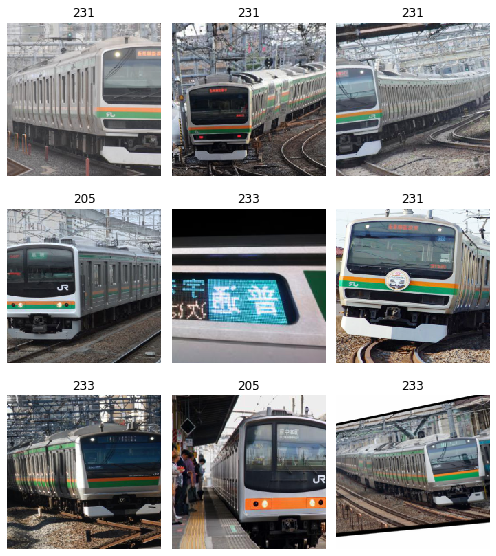

In [0]:
data.show_batch(rows=3, figsize=(7, 8))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.966522,2.240602,0.600000,02:05
1,1.431873,1.282750,0.400000,02:06
2,1.146641,0.929483,0.237500,02:06
3,0.987675,0.824250,0.187500,02:06


In [0]:
learn.save('stage-1')

In [20]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (323 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
205,205,205,205,205
Path: /content/gdrive/My Drive/DL_datas/images/trains;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
231,233,205,205,205
Path: /content/gdrive/My Drive/DL_datas/images/trains;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(6

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


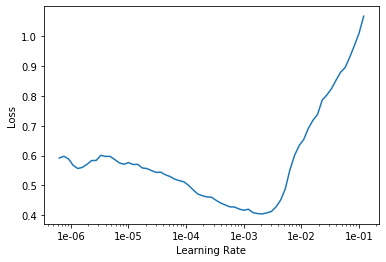

In [17]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(2, max_lr=slice(2e-4, 2e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.681641,2.923300,0.437500,02:55
1,0.763591,1.476981,0.262500,02:57


In [0]:
learn.save('stage-2')

In [25]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (323 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
205,205,205,205,205
Path: /content/gdrive/My Drive/DL_datas/images/trains;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
231,233,205,205,205
Path: /content/gdrive/My Drive/DL_datas/images/trains;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(6

In [26]:
interp = ClassificationInterpretation.from_learner(learn)

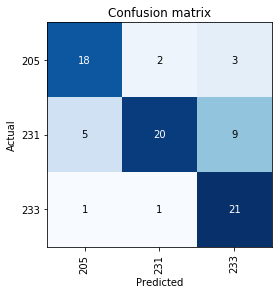

In [27]:
interp.plot_confusion_matrix()

not work code below in colab

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path).split_none().label_from_folder().transform(get_transforms(), size=224).databunch())

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (470 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
205,205,205,205,205
Path: /content/gdrive/My Drive/DL_datas/images/trains;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/gdrive/My Drive/DL_datas/images/trains;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): 

In [0]:
ds,idxs = DatasetFormatter().from_toplosses(learn_cln)